# An exploratory data analysis of the Titanic's casualties 

This notebook consists of a descriptive analysis of the Kaggle's Titanic Dataset. It tries to offer some insights on how the casualties distributed among the passengers, showing the most and least affected.

The main 3 questions it tries to answer are:

1. "Women and children first" is a code of conduct whereby the lives of women and children are to be saved first in a life-threatening situation. However a study by study the Uppsala University in 2012, that makes a reviews 19th-century shipwreck narratives does not find strong evidence for this to be the case. So the first question that this analysis embarks on is: "Were women and children really first or the evacuation was a chaotic free-for-all in terms of casualties?"

2. How were the casualties distributed in terms of the passengers' socio-economic status? Was there a statistically significant difference between them?

3. How likely was a person to survive if he/she were alone compared to if he were with his family?

## Exploratory data analysis

### Basic settings and reading the data 
The first step was to import the libraries needed for the analysis:

In [53]:
# Import the libraries that will be used during the analysis
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Secondly, I decided to establish some basic settings for the visualizations:

In [7]:
# General settings for the visualizations
sns.set(context = 'notebook', style = 'whitegrid', rc = {'axes.grid': False, 
                                                         'grid.color': '1',
                                                         'text.color': '.2',
                                                         'legend.frameon': True,
                                                         'axes.axisbelow': True,
                                                         'axes.edgecolor': '.8',
                                                         'axes.facecolor': 'white',
                                                         'axes.grid': False,
                                                         'axes.labelcolor': '.4',
                                                         'axes.linewidth': 1.0,
                                                         'xtick.color': '.4',
                                                         'ytick.color': '.4'})
sns.set_palette(["#1b85b8", "#5a5255", "#559e83", "#ae5a41", "#c3cb71"])
%matplotlib inline

Next, I read the *.csv* dataset file and took a look at the variables that composed it and the descriptions available for the them in Kaggle:

In [90]:
# Read the dataset
titanic_df = pd.read_csv('titanic_data.csv')

# Variables and their corresponding data types
titanic_dtypes = titanic_df.dtypes # Shown in the table below 

The dataset included the following 12 variables with their respective description and data type:

 Variable   | Description          | Type
------------|----------------------|-------------
PassengerId |    Passenger internal ID number | int64
Survived    |    Survival (0 = No; 1 = Yes) | int64
Pclass      |    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) | int64
Name        |    Name | object
Sex         |    Sex | object
Age         |    Age | float64
Sibsp       |    Number of Siblings/Spouses Aboard | int64
Parch       |    Number of Parents/Children Aboard | int64
Ticket      |    Ticket Number | object
Fare        |    Passenger Fare |float64
Cabin       |    Cabin | object
Embarked    |    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) | object

### Data filtering and summary statistics

Once the data was read I did some cleaning of it. First, based on the questions presented previously  there were some variables that I decided to left out as they were not relevant for the analysis. The variables kept were the following 7: *Survived, Pclass, Sex, Age, SibSp, Parch and Fare*.

In [91]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

After that, I decided to take a look at the structure of the dataset by counting the number of observations (rows), looking at the first and last rows of the dataset (to see if the data was read correctly) and generating summary statistics of the numerical variables

In [92]:
# Number of rows of the dataset
titanic_df.shape

(891, 7)

In [93]:
# Top of the dataset
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [94]:
# Bottom of the dataset
titanic_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,0,2,male,27.0,0,0,13.00
887,1,1,female,19.0,0,0,30.00
888,0,3,female,NaN,1,2,23.45
889,1,1,male,26.0,0,0,30.00
890,0,3,male,32.0,0,0,7.75


In [95]:
# Summary statistics of the numerical variables
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some first observations from the sample statistics were made:

- 38.38% of the passengers survived the shipwreck
- The average age of the passengers was of 29.70 years, with a standard deviation of 14.53 years. The oldest person had 80 years and the youngest 5 months.
- The passengers paid an average fare paid of 32.20 pounds with a standard deviation of 49.69 pounds. The cheapest fare paid was 0 pounds -which makes an interesting thing to look at in the next sections- and the highest fare paid was of 512.33 pounds.
- A numerous amount of passengers doesn't have their age reported

Next, I decided to take a look at the number of null values to see how relevant was its impact.

In [100]:
# Check for NaN values in the dataset
titanic_df.isnull().sum().to_frame().rename(columns={0: 'NaN Count'})

,NaN Count
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


As expected the only variable that had null values was the age. It contained 177 null values out of 891 observations, a quite large number. I decided to remove those observations when doing the analysis that involved using that variable. But chose not to do it on analysis that did not involve that variable since an important amount of information would be lost if chose to do that.

### Effects of sex and age

In the following section I investigated the distribution of casualties and survivors in terms of sex and age. 

The first step was to delete the observations that had did not have age values reported:

In [16]:
# Generate new dataframe removing the NaN values from the original dataframe
titanic_q1_df = titanic_df.dropna()[['Survived', 'Age']]

Next, I decided to see if the survival rate had changed: 

In [17]:
# Summary statistics for the variables Survived and Age
titanic_q1_df.describe()

,Survived,Age
count,714.000000,714.000000
mean,0.406162,29.699118
std,0.491460,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


Once the null values were removed (resulting in a smaller sample size) the survival rate increased slightly to 40.61%. Additionally, it was possible to obtain the values of the 25%, 50% and 75% quantiles for the age. Their values are respectively 20.13, 28 and 38 years old.

After that, I decided to see if there were any difference in how the distribution by age in the surviving and non-surviving groups. For that I created three groups by ages:

- Children: Ages less than 18 years old
- Adults: Ages between 18 and 65 years old
- Elderly: Ages more than 65 years old

Those groups were assigned in a new variable (column) called *AgeGroup*:

In [23]:
# Generate groups by age
titanic_q1_df.loc[titanic_q1_df.Age < 18,'AgeGroup'] = 'Children'
titanic_q1_df.loc[(titanic_q1_df.Age >= 18) & (titanic_q1_df.Age < 65),'AgeGroup'] = 'Adults'
titanic_q1_df.loc[titanic_q1_df.Age > 60,'AgeGroup'] = 'Elderly'

Then, using those groups, I calculated the distribution by age among the surviving and non-surviving groups.

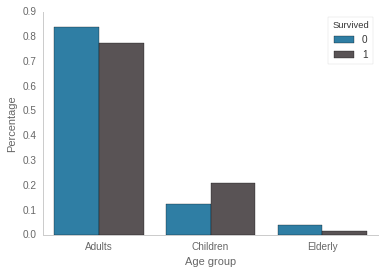

In [103]:
# Generate relative frequency by age group dataframe to graph
agegroup_df = pd.crosstab(titanic_q1_df['AgeGroup'], titanic_q1_df['Survived'], 
                          normalize = 1).stack().to_frame().reset_index()
agegroup_df = agegroup_df.rename(columns={0: 'Percentage'})

# Graph 
sns.barplot(x = 'AgeGroup', y = 'Percentage', hue = 'Survived', data = agegroup_df)
sns.axlabel('Age group', 'Percentage')
sns.despine()

It can be seen that there are some important differences in the distributions by age among the survivors and non-survivors. The adults (between 18 and 60 years old) represent 83.72% of the casualties but close to 6.5 percentual points less of the group surviving group (77.24%). On the other hand, the children (less than 18 years old) group show the most important difference. In terms of casualties they represent 12.26% and in the surviving group, they represent 21.03%. Finally, the elderly (more than 60 years old) are 4.01% of the casualties and 1.72% of the survivors.

At first sight, one can conclude that children were more likely to survive than the other groups. However, it might be interesting to see if those behaviors are also observed in the proportions of survivors and casualties by age group. It is possible that only relative to the composition of the age groups children were more likely to survive as it might occur that their survival rate was still less than 50% (meaning that they were more likely to perish than to survive). 

Using a very similar process than for the figure above, the proportions of casualties and survivors relative to each age group were obtained and are shown below:

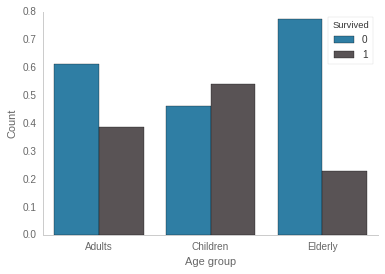

In [106]:
# Generate counts by age group dataframe to graph
counts_df = pd.crosstab(titanic_q1_df['AgeGroup'], titanic_q1_df['Survived'], normalize = 0).stack().to_frame().reset_index()
counts_df = counts_df.rename(columns={0: 'Count'})

# Graph
sns.barplot(x = 'AgeGroup', y = 'Count', hue = 'Survived', data = counts_df)
sns.axlabel('Age group', 'Count')
sns.despine()

For the adults and elderly groups, the counts just reaffirms the idea that those groups were much more likely to perish than to survive. However, in the case of children a very different picture appears. For children it occured that 

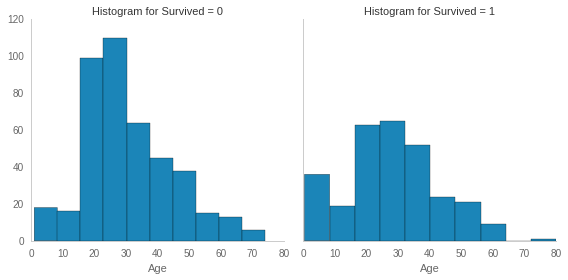

In [52]:
g = sns.FacetGrid(titanic_q1_df, col = 'Survived', size = 4)
g = (g.map(sns.plt.hist, 'Age')
     .set_titles("Histogram for Survived = {col_name}"))
sns.despine()

It is possible to see that the distribution looks very different. The casualties 

        Survived  Pclass  Age  SibSp  Parch  Fare
Sex                                              
female       197     197  197    197    197   197
male          93      93   93     93     93    93
        Survived  Pclass  Age  SibSp  Parch  Fare
Sex                                              
female        64      64   64     64     64    64
male         360     360  360    360    360   360


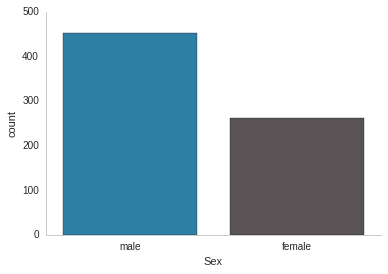

In [34]:
plot = sns.countplot(x = 'Sex', data = titanic_q1_df)
sns.despine()

titanic_surv_df = titanic_q1_df[titanic_q1_df.Survived == 1]
titanic_nosurv_df = titanic_q1_df[titanic_q1_df.Survived == 0]

print(titanic_surv_df.groupby('Sex').count())
print(titanic_nosurv_df.groupby('Sex').count())

# References

* [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

* [Women and children first](http://www.cam.ac.uk/research/discussion/shipwrecked-women-and-children-first)

